In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import sqlite3
import sqlalchemy
sns.set_style("darkgrid")
sns.set(font_scale=1.7)

In [2]:
engine = sqlalchemy.create_engine('sqlite:///database.db')

In [3]:
buy_ticker = "AAPL"
sell_ticker = "MSFT"

dataframe = pd.read_sql_query(
    f"SELECT Date, {buy_ticker}, {sell_ticker} FROM stockData", engine, parse_dates="Date")

In [4]:
data = pd.DataFrame({
    "Date" : dataframe.Date,
    buy_ticker : dataframe[buy_ticker],
    sell_ticker : dataframe[sell_ticker],
    'ratio': (dataframe[buy_ticker]/dataframe[sell_ticker]).round(4),
    'spread': (dataframe[buy_ticker]-dataframe[sell_ticker]).round(2)
})

In [5]:
data.head(2)

,Date,AAPL,MSFT,ratio,spread
0,2015-01-05,23.87,40.34,0.5917,-16.47
1,2015-01-06,23.88,39.74,0.6009,-15.86


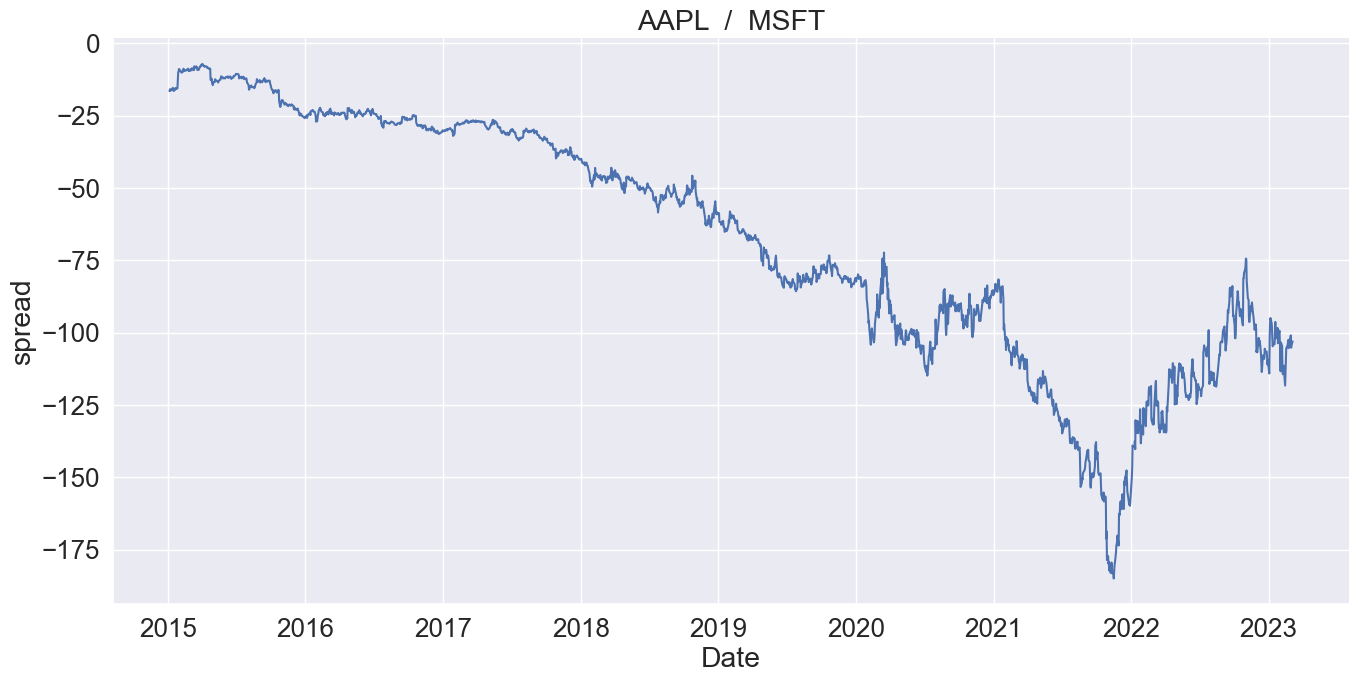

In [6]:
# chart_data = sns.FacetGrid(data, row_order=[data[buy_ticker], data[sell_ticker], 'ratio', 'spread'] )
ratio_plot = sns.relplot(data=data, x="Date", y="spread", kind='line', height=7, aspect=2).set(title=f'{buy_ticker}  /  {sell_ticker}')

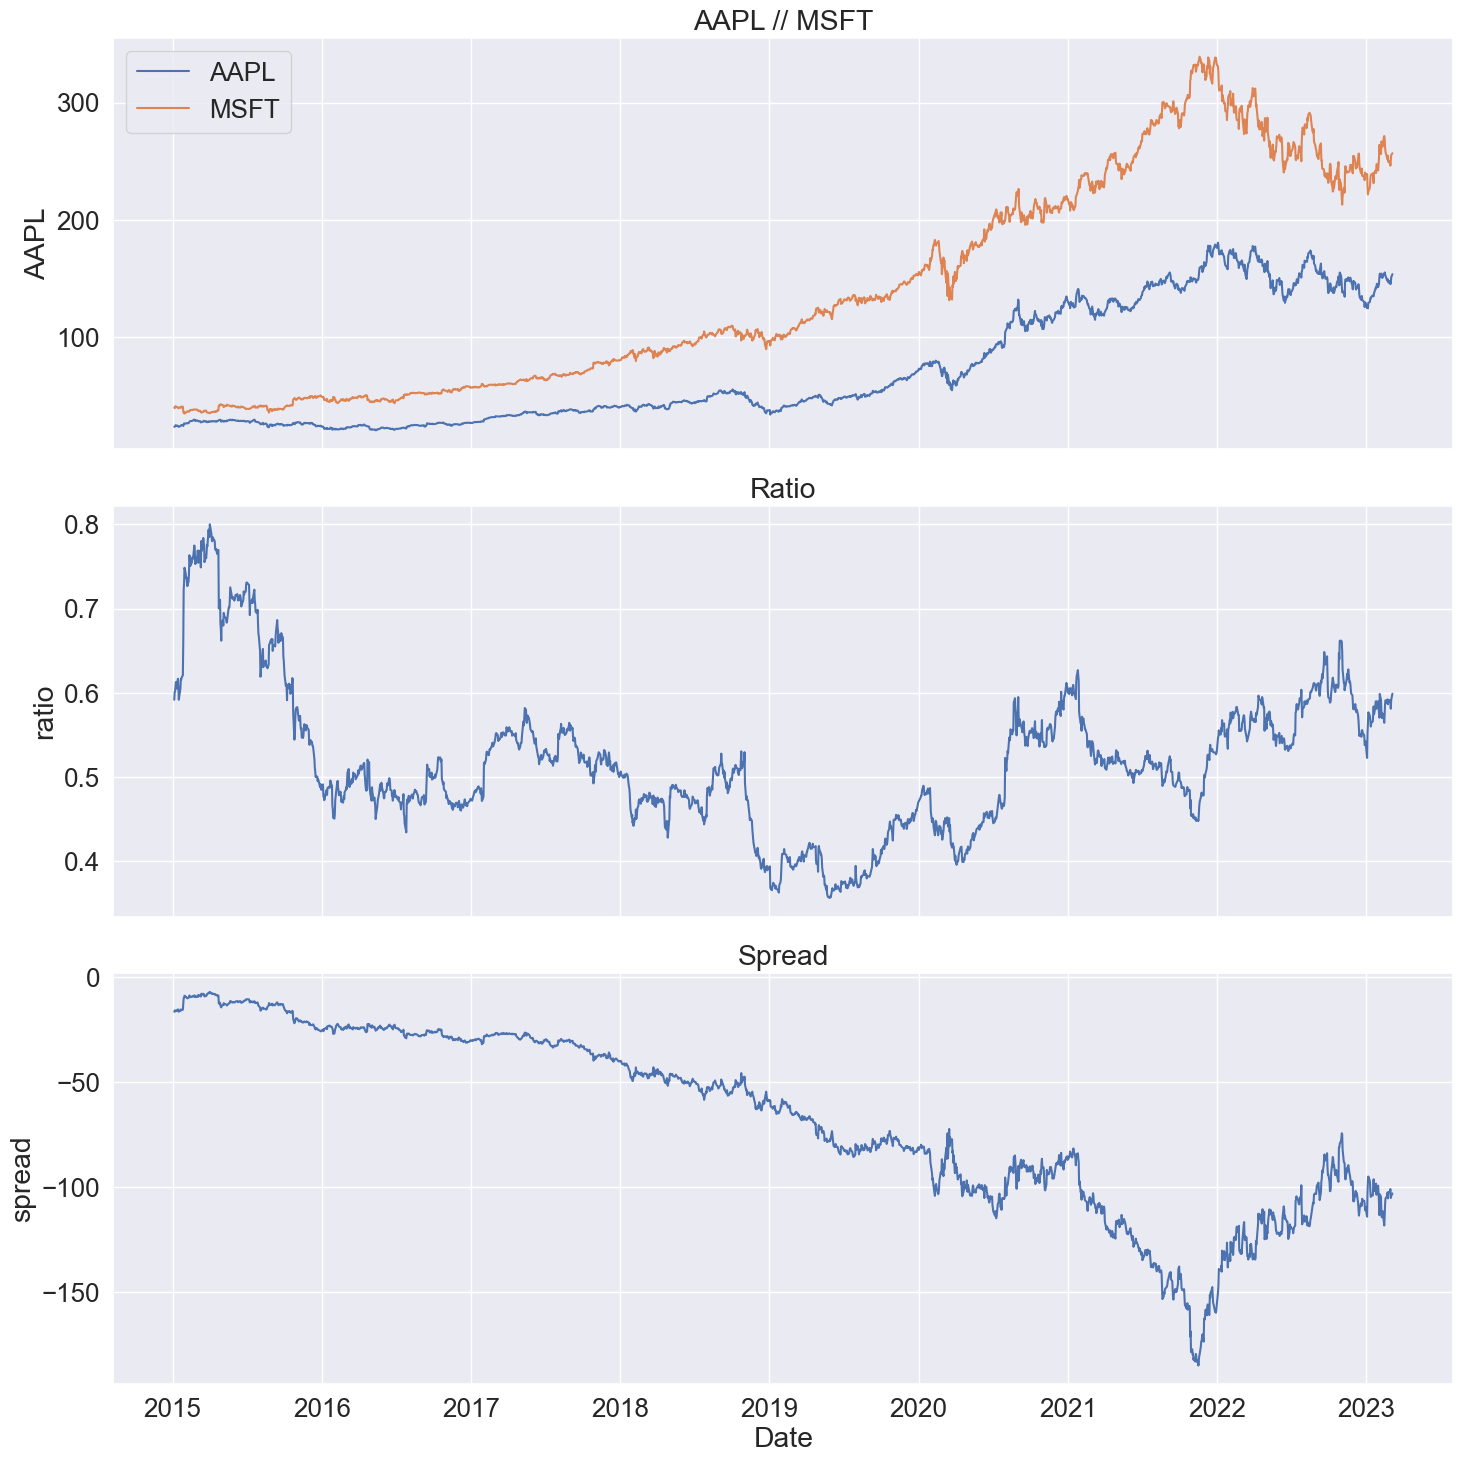

In [7]:
fig, axes = plt.subplots(3, figsize=(15, 15), sharex=True)
axes[0].set_title(
    f"{buy_ticker} // {sell_ticker}")
sns.lineplot(data=data, x="Date", y=buy_ticker,
             ax=axes[0], label=buy_ticker)
sns.lineplot(data=data, x="Date", y=sell_ticker,
             ax=axes[0], label=sell_ticker)
axes[1].set_title(f"Ratio")
sns.lineplot(data=data, x="Date", y="ratio", ax=axes[1])
axes[2].set_title(f"Spread")
sns.lineplot(data=data, x="Date", y="spread", ax=axes[2])
plt.tight_layout(pad=1)

In [8]:
fig.savefig(r'd://Trading/test/'+f"{buy_ticker}__{sell_ticker}")
plt.close()